In [17]:
# import dependancies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
import time
import json
from scipy.stats import linregress
from cycler import cycler


In [2]:
# read in csv, print dataframe
app_adm_df = pd.read_csv("clean_app_data.csv", encoding="utf-8")
app_adm_df

,College_names,Year,applicants_total,applicants_men,applicants_women,admissions_total,admissions_men,admissions_women,% applicants change,% admissions_change,applications_vs_admissions
0,Arizona State University-Tempe,2002,18155,8423,9732,15385,6979,8406,NaN,NaN,-2770
1,Arizona State University-Tempe,2003,19785,9192,10593,17490,7949,9541,0.089782,0.136822,-2295
2,Arizona State University-Tempe,2004,20789,9639,11150,17899,8129,9770,0.050746,0.023385,-2890
3,Arizona State University-Tempe,2005,19914,9398,10516,18126,8394,9732,-0.042090,0.012682,-1788
4,Arizona State University-Tempe,2006,20702,10093,10609,19133,9169,9964,0.039570,0.055556,-1569
...,...,...,...,...,...,...,...,...,...,...,...
199,Washington State University,2014,14887,6760,8127,12219,5403,6816,0.000000,0.000000,-2668
200,Washington State University,2015,19766,8594,11172,15742,6658,9084,0.327736,0.288321,-4024
201,Washington State University,2016,23223,9716,13507,16731,6736,9995,0.174896,0.062826,-6492
202,Washington State University,2017,22565,9416,13149,16487,6766,9721,-0.028334,-0.014584,-6078


In [3]:
app_adm_df['admissions_vs_applications'] = app_adm_df['applicants_total'] - app_adm_df['admissions_total']
app_adm_df.head(20)

,College_names,Year,applicants_total,applicants_men,applicants_women,admissions_total,admissions_men,admissions_women,% applicants change,% admissions_change,applications_vs_admissions,admissions_vs_applications
0,Arizona State University-Tempe,2002,18155,8423,9732,15385,6979,8406,NaN,NaN,-2770,2770
1,Arizona State University-Tempe,2003,19785,9192,10593,17490,7949,9541,0.089782,0.136822,-2295,2295
2,Arizona State University-Tempe,2004,20789,9639,11150,17899,8129,9770,0.050746,0.023385,-2890,2890
3,Arizona State University-Tempe,2005,19914,9398,10516,18126,8394,9732,-0.042090,0.012682,-1788,1788
4,Arizona State University-Tempe,2006,20702,10093,10609,19133,9169,9964,0.039570,0.055556,-1569,1569
5,Arizona State University-Tempe,2007,20702,10093,10609,19133,9169,9964,0.000000,0.000000,-1569,1569
6,Arizona State University-Tempe,2008,24922,11953,12969,23504,11081,12423,0.203845,0.228453,-1418,1418
7,Arizona State University-Tempe,2009,27089,12955,14134,24473,11530,12943,0.086951,0.041227,-2616,2616
8,Arizona State University-Tempe,2010,28304,13807,14497,25616,12235,13381,0.044852,0.046705,-2688,2688
9,Arizona State University-Tempe,2011,29771,14512,15259,25795,12339,13456,0.051830,0.006988,-3976,3976


In [4]:
WSU = app_adm_df.loc[app_adm_df["College_names"] == 'Washington State University']
ASU = app_adm_df.loc[app_adm_df["College_names"] == 'Arizona State University-Tempe']
UCLA = app_adm_df.loc[app_adm_df["College_names"] == 'University of California-Los Angeles']
Stanford = app_adm_df.loc[app_adm_df["College_names"] == 'Stanford University']
UofA = app_adm_df.loc[app_adm_df["College_names"] == 'University of Arizona']
Berkeley = app_adm_df.loc[app_adm_df["College_names"] == 'University of California-Berkeley']
UCBoulder = app_adm_df.loc[app_adm_df["College_names"] == 'University of Colorado Boulder']
USC = app_adm_df.loc[app_adm_df["College_names"] == 'University of Southern California']
UW = app_adm_df.loc[app_adm_df["College_names"] == 'University of Washington-Seattle Campus']
OSU = app_adm_df.loc[app_adm_df["College_names"] == 'Oregon State University']
UofO = app_adm_df.loc[app_adm_df["College_names"] == 'University of Oregon']
UofU = app_adm_df.loc[app_adm_df["College_names"] == 'University of Utah']
school_data = [WSU, ASU, UCLA, Stanford, UofA, Berkeley, UCBoulder, USC, UW, OSU, UofO, UofU]

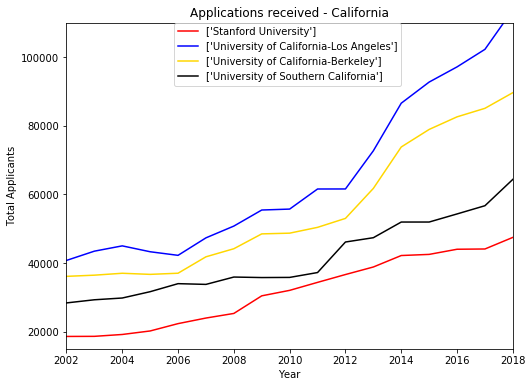

In [33]:
school_data = Stanford, UCLA, Berkeley, USC
for school in school_data:
        x_values = school['Year']
        y_values = school['applicants_total']
        plt.rc('axes', prop_cycle=(cycler('color', ['red', 'blue', 'gold','black'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.75, 1), loc='best', borderaxespad=0.)
plt.title("Applications received - California")
plt.xlabel("Year")
plt.ylabel("Total Applicants")
plt.xlim(min(x_values),max(x_values))
plt.ylim(15000,110000)
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.savefig("images/applicants_CA.png")


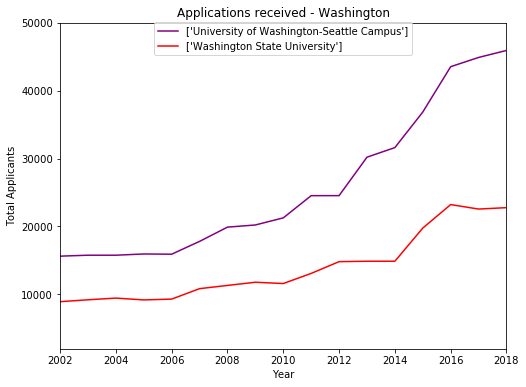

In [34]:
school_data = UW, WSU
for school in school_data:
        x_values = school['Year']
        y_values = school['applicants_total']
        plt.rc('axes', prop_cycle=(cycler('color', ['purple', 'red'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.5, .95), loc='center', borderaxespad=0.)
plt.title("Applications received - Washington")
plt.xlabel("Year")
plt.ylabel("Total Applicants")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.savefig("images/applicants_WA.png")

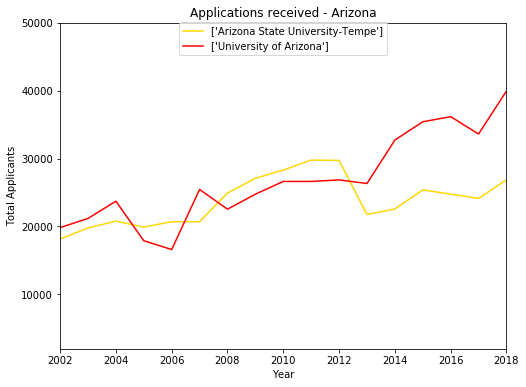

In [28]:
school_data = ASU, UofA
for school in school_data:
        x_values = school['Year']
        y_values = school['applicants_total']
        plt.rc('axes', prop_cycle=(cycler('color', ['gold', 'red'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.5, .95), loc='center', borderaxespad=0.)
plt.title("Applications received - Arizona")
plt.xlabel("Year")
plt.ylabel("Total Applicants")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.savefig("images/applicants_AZ.png")

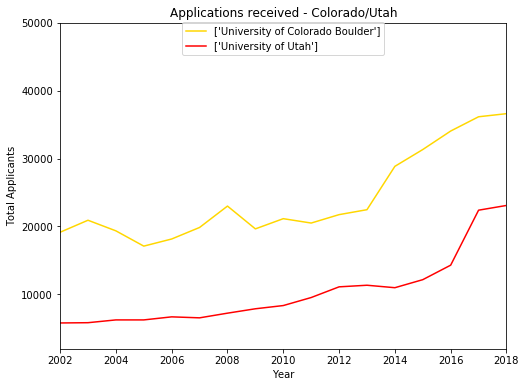

In [35]:
school_data = UCBoulder, UofU
for school in school_data:
        x_values = school['Year']
        y_values = school['applicants_total']
        plt.rc('axes', prop_cycle=(cycler('color', ['gold', 'red'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.5, .95), loc='center', borderaxespad=0.)
plt.title("Applications received - Colorado/Utah")
plt.xlabel("Year")
plt.ylabel("Total Applicants")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.savefig("images/applicants_CO_UT.png")

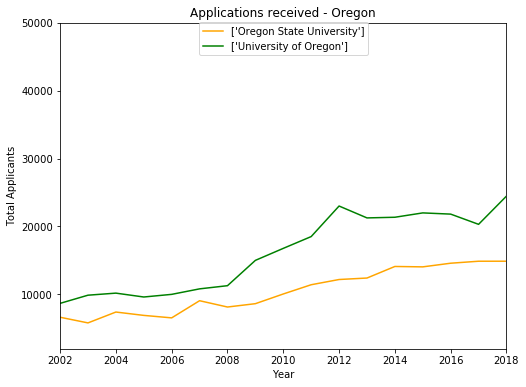

In [36]:
school_data = OSU, UofO
for school in school_data:
        x_values = school['Year']
        y_values = school['applicants_total']
        plt.rc('axes', prop_cycle=(cycler('color', ['orange', 'green'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.5, .95), loc='center', borderaxespad=0.)
plt.title("Applications received - Oregon")
plt.xlabel("Year")
plt.ylabel("Total Applicants")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.savefig("images/applicants_OR.png")

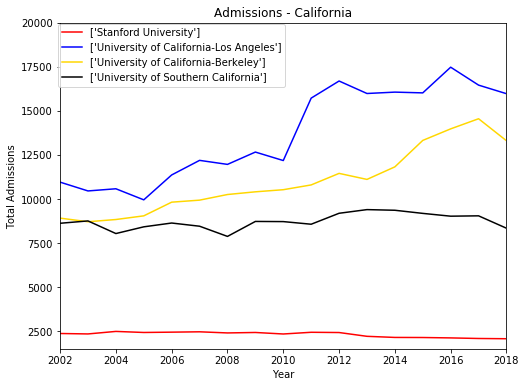

In [39]:
school_data = Stanford, UCLA, Berkeley, USC
for school in school_data:
        x_values = school['Year']
        y_values = school['admissions_total']
        plt.rc('axes', prop_cycle=(cycler('color', ['red', 'blue', 'gold','black'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.25, .90), loc='center', borderaxespad=0.)
plt.title("Admissions - California")
plt.xlabel("Year")
plt.ylabel("Total Admissions")
plt.xlim(min(x_values),max(x_values))
plt.ylim(1500,20000)
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.savefig("images/admissions_CA.png")

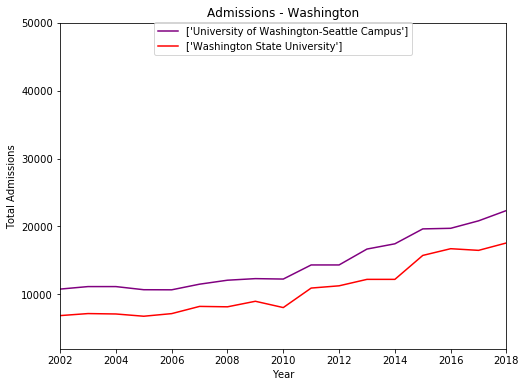

In [40]:
school_data = UW, WSU
for school in school_data:
        x_values = school['Year']
        y_values = school['admissions_total']
        _values = school['applicants_total']
        plt.rc('axes', prop_cycle=(cycler('color', ['purple', 'red'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.5, .95), loc='center', borderaxespad=0.)
plt.title("Admissions - Washington")
plt.xlabel("Year")
plt.ylabel("Total Admissions")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.savefig("images/admissions_WA.png")

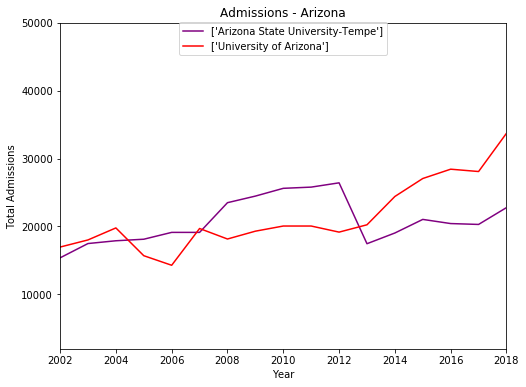

In [41]:
school_data = ASU, UofA
for school in school_data:
        x_values = school['Year']
        y_values = school['admissions_total']
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.5, .95), loc='center', borderaxespad=0.)
plt.title("Admissions - Arizona")
plt.xlabel("Year")
plt.ylabel("Total Admissions")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.savefig("images/admissions_AZ.png")

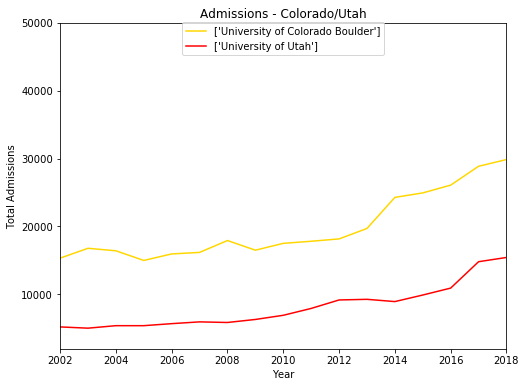

In [42]:
school_data = UCBoulder, UofU
for school in school_data:
        x_values = school['Year']
        y_values = school['admissions_total']
        _values = school['applicants_total']
        plt.rc('axes', prop_cycle=(cycler('color', ['gold', 'red'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.5, .95), loc='center', borderaxespad=0.)
plt.title("Admissions - Colorado/Utah")
plt.xlabel("Year")
plt.ylabel("Total Admissions")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.savefig("images/admissions_CO_UT.png")

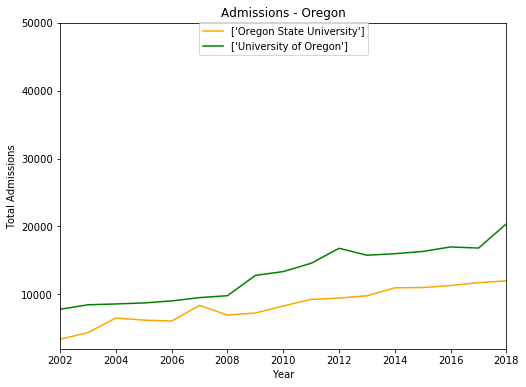

In [43]:
school_data = OSU, UofO
for school in school_data:
        x_values = school['Year']
        y_values = school['admissions_total']
        _values = school['applicants_total']
        plt.rc('axes', prop_cycle=(cycler('color', ['orange', 'green'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.5, .95), loc='center', borderaxespad=0.)
plt.title("Admissions - Oregon")
plt.xlabel("Year")
plt.ylabel("Total Admissions")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.savefig("images/admissions_OR.png")